# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv", index_col = [0])
south_df = pd.read_csv("SouthCallCenter.csv", index_col = [0])

In [2]:
north_df.head(10)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [3]:
south_df.head(10)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
#Code Used:
# north_df["Rep ID"]
# north_df["Rep ID"].count()
north_df["Rep ID"].value_counts().count()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
south_df["Rep ID"].value_counts().count()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
#Code Used:
north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
#Code Used:
south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

In [8]:
north_df['Time Block'].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [9]:
south_df['Time Block'].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [10]:
# Code Used:

both_branches = pd.concat([north_df, south_df])
# (left=north_df, right=south_df, on = "Time Block", suffixes = ["- North", "- South"], indicator = True)
both_branches


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [11]:
both_branches.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

In [12]:
both_branches['Incoming Wait Time'].value_counts()

4.0    50
2.0    44
3.0    41
1.0    37
5.0    36
Name: Incoming Wait Time, dtype: int64

In [13]:
time_combined = both_branches.groupby('Time Block')['Calls'].count()
time_combined

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05 
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: I would leave missing value as it is

In [14]:
# Code Used
# Add Additional Cells as needed.
missing_north_df = north_df.isna().mean() * 100
missing_north_df

Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       66.530612
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64

In [15]:
missing_south_df = north_df.isna().mean() * 100
missing_south_df

Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       66.530612
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here: Look into all "Yes" values and see which two has something wrong with them
> Your Answer: There was one 'YES ' with a space at the end. I replace it with the same 'YES' value that other rows had.

In [16]:
north_df['Sale'].unique()

array(['NO', 'YES ', 'YES'], dtype=object)

In [17]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].replace('YES ', 'YES', inplace = True)

In [18]:
north_df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: Both dataset have no duplicates.

In [19]:
#Code Used
# Add Additional Cells as needed.
north_df.duplicated().value_counts()

False    243
True       2
dtype: int64

In [20]:
south_df.duplicated().value_counts()

False    311
True       3
dtype: int64

In [21]:
north_df.drop_duplicates()
print(north_df.shape)

(245, 14)


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Branch and calls columns have repetitve same values 100%, but I will keep those columns because I will need "Branch" column when I concatenate two datasets. I might need "Calls" column later for calculations.

In [22]:
#Code Used
# Add Additional Cells as needed.
num_rows = len(north_df.index)
low_information_cols = [] #

for col in north_df.columns:
    cnts = north_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
North    245
Name: Branch, dtype: int64

Sale: 95.51020%
NO     234
YES     11
Name: Sale, dtype: int64

Lost Call: 97.95918%
0    240
1      5
Name: Lost Call, dtype: int64

Abandoned: 97.14286%
0    238
1      7
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    245
Name: Calls, dtype: int64



In [23]:
num_rows = len(south_df.index)
low_information_cols = [] #

for col in south_df.columns:
    cnts = south_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
South    314
Name: Branch, dtype: int64

Sale: 98.08917%
NO     308
YES      6
Name: Sale, dtype: int64

Lost Call: 96.49682%
0    303
1     11
Name: Lost Call, dtype: int64

Abandoned: 98.72611%
0    310
1      4
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    314
Name: Calls, dtype: int64



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [24]:
# I used concat because all the columns in both dataset have the same names. Ignored index so that I don't have repeating index numbers.

In [25]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df], ignore_index = True)
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35


In [26]:
# Code Used
# Add Additional Cells as needed
highest_rep = df.groupby(['Branch', 'Rep ID'])['Calls'].sum()
highest_rep.sort_values(ascending=False)

Branch  Rep ID
North   Brent     37
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
North   Lilly     30
        Duke      29
        Todd      29
South   Kate      29
        George    29
        Karl      28
        Josh      26
        Susan     26
North   Joe       26
South   Sharon    25
North   Xander    24
        Cam       24
        Andy      23
        Amanda    23
South   Alice     20
Name: Calls, dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 0.03
- South Branch = 0.01
- Company Wide = 0.02
- Do any of these fall out of the optimal range of 2-5%? South Branch falls below 2% which is very good result.

In [27]:
# Code Used
# Add Additional Cells as needed.
df.groupby(['Branch'])['Abandoned'].mean()

Branch
North    0.028571
South    0.012739
Name: Abandoned, dtype: float64

In [28]:
df['Abandoned'].mean()

0.01967799642218247

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.243902439024396
- South Branch = 38.095238095238095
- Company Wide = 38.94230769230769

In [29]:
# Code Used
# Add Additional Cells as needed.
# north_two = north_df['Incoming Wait Time'].value_counts()
# north_two
north_df['Incoming Wait Time'].count()

82

In [30]:
south_df['Incoming Wait Time'].count()

126

In [31]:
df['Incoming Wait Time'].count()
# df['Incoming or Outgoing'].count()

208

In [32]:
df_two = df[df['Incoming Wait Time'] <= 2]
df_percent_calls = (df_two['Incoming Wait Time'].count()/208) * 100
df_percent_calls

38.94230769230769

In [33]:
northdf_two = north_df[north_df['Incoming Wait Time'] <= 2]
northdf_percent_calls = (northdf_two['Incoming Wait Time'].count()/82) * 100
northdf_percent_calls

40.243902439024396

In [34]:
southdf_two = south_df[south_df['Incoming Wait Time'] <= 2]
southdf_percent_calls = (southdf_two['Incoming Wait Time'].count()/126) * 100
southdf_percent_calls

38.095238095238095

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 2.97
- South Branch in seconds = 3.08
- Company Wide in seconds = 3.03


In [35]:
# Code Used 
df.groupby('Branch')['During Call Wait Time'].mean()

Branch
North    2.967347
South    3.076433
Name: During Call Wait Time, dtype: float64

In [36]:
df['During Call Wait Time'].mean()

3.0286225402504474

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose Bar chart because it is easy to read and compare. 

Text(0, 0.5, 'Abandonment Rates in Seconds')

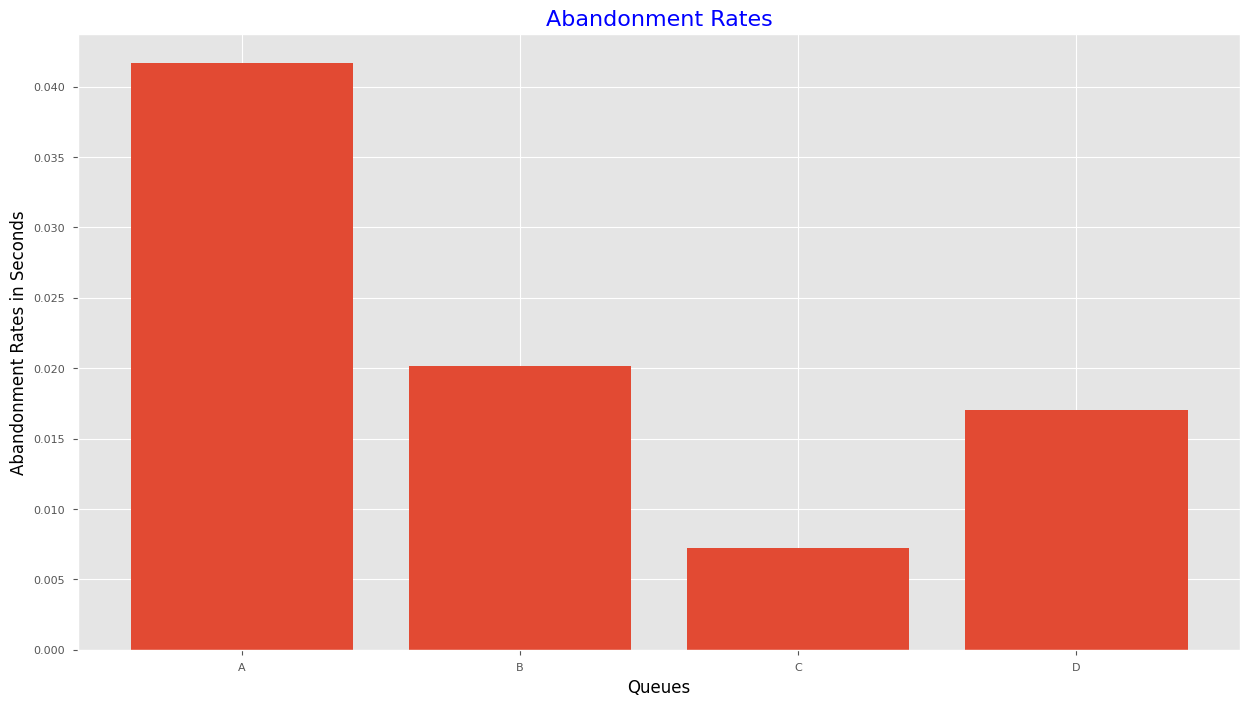

In [49]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
plt.rcParams['figure.figsize'] = (15, 8)
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
queues2 = list(abandonment_rates.keys())
rates = list(abandonment_rates.values())

style.use('ggplot')
plt.bar(queues2, rates)
plt.title("Abandonment Rates", color = 'blue', fontsize = 16)
plt.xlabel("Queues", color = 'black', fontsize = 12)
plt.ylabel("Abandonment Rates in Seconds", color = 'black', fontsize = 12)
# plt.figure(figsize=(10,5))
# plt.legend(title = 'Rate Per Queue', loc = 2)


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used groupped bar chart to show each rep separately and easy to compare to other represantatives. 

In [38]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID", suffixes = ["_less_than_2", "_total"])

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_less_than_2"]/service_level["Calls_total"] * 100

#Your Code Here:

In [39]:
service_level

,Calls_less_than_2,Calls_total,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


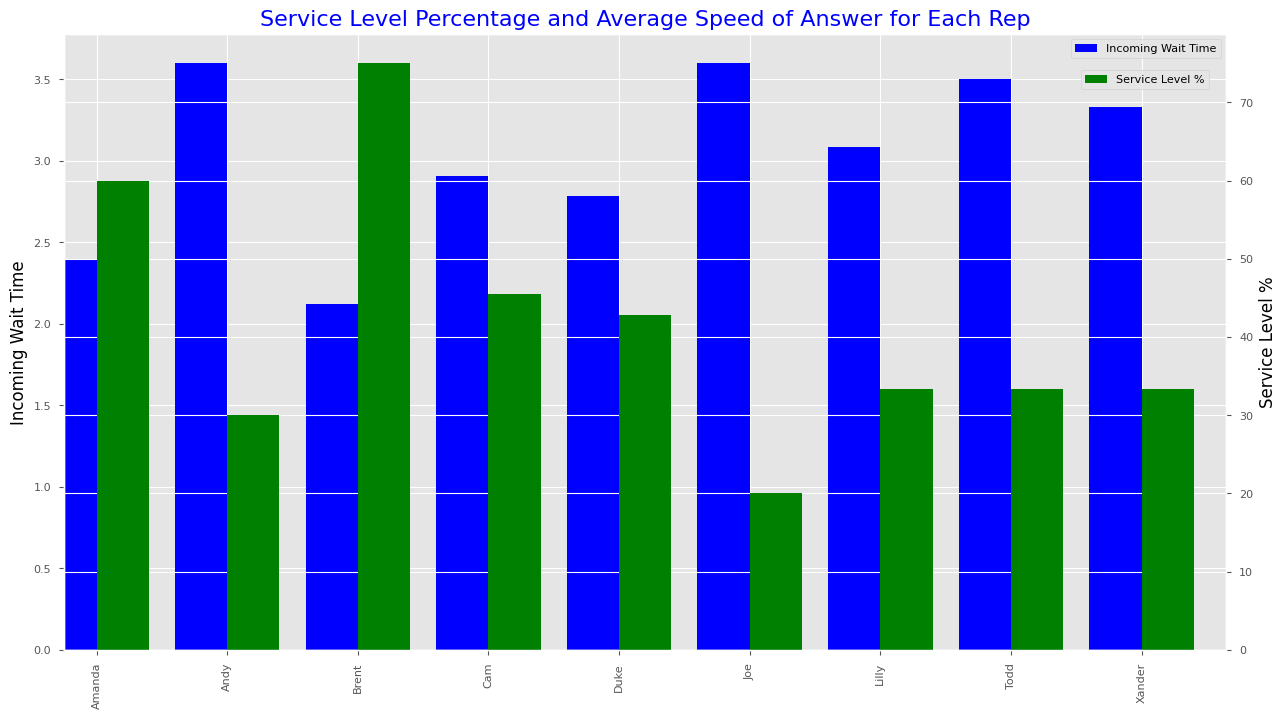

In [50]:
# plt.style.use('seaborn-v0_8-paper')
fig = plt.figure()
ax = fig.add_subplot(111) 
ax2 = ax.twinx()
width = 0.4
north_plt.plot(kind = 'bar', color = 'blue', ax = ax, width = width, position = 1)
service_level["Service Level %"].plot(kind = 'bar', color = 'green', ax = ax2, width = width, position = 0)

ax.set_ylabel("Incoming Wait Time", fontsize = 12, color = 'black')
ax2.set_ylabel("Service Level %", fontsize = 12, color = 'black')
plt.title("Service Level Percentage and Average Speed of Answer for Each Rep", color = 'blue', fontsize = 16)
plt.legend(loc = 0, bbox_to_anchor = (0.49, 0.45, 0.5, 0.5))

# service_level.plot(kind = 'bar', figsize = (15, 8), position = 1)

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose Stacked Bar Chart because incoming versus outgoing calls per purpose easily can be seen in this chart.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


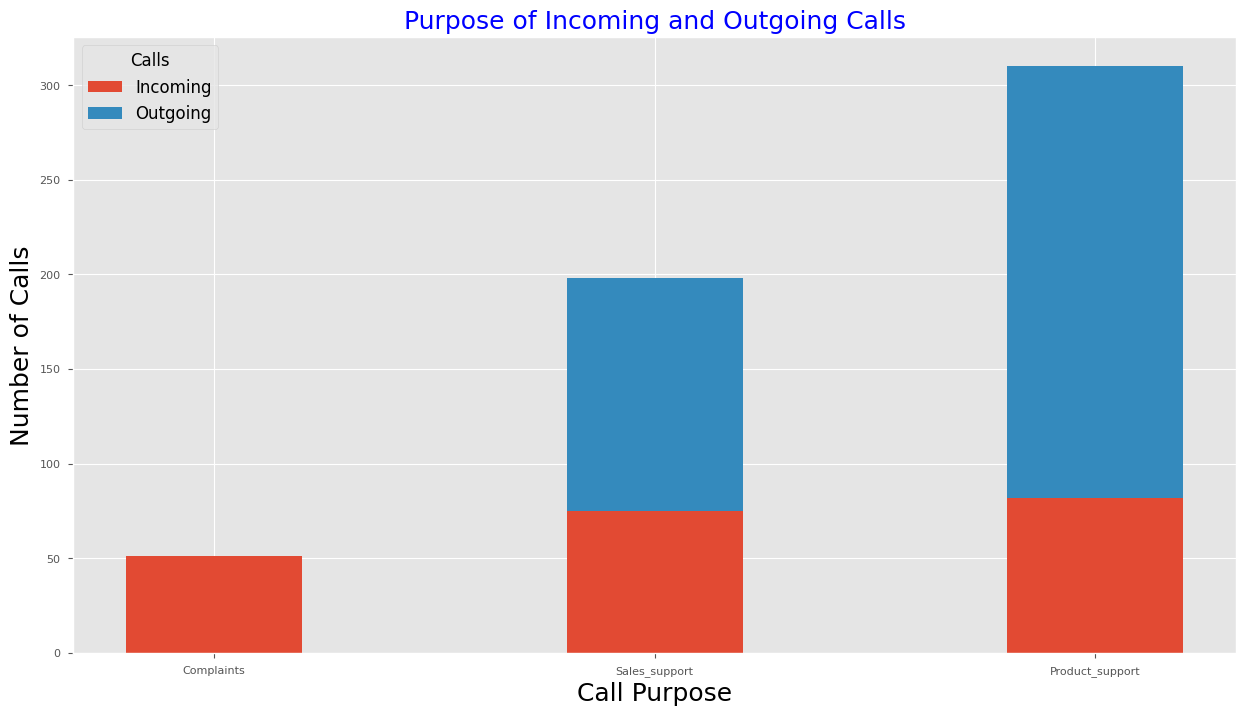

In [52]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()
  
x = ['Complaints', 'Sales_support', 'Product_support']

incoming = [51, 75, 82]
outgoing = [0, 123, 228]


import numpy as np

plt.bar(x, incoming, 0.4, label = "Incoming")
plt.bar(x, outgoing, 0.4, bottom=incoming, label = "Outgoing")

plt.title("Purpose of Incoming and Outgoing Calls", fontsize = 18, color = 'blue')
plt.xlabel("Call Purpose", fontsize = 18, color = 'black')
plt.ylabel("Number of Calls", fontsize = 18, color = 'black')
plt.legend(title = 'Calls', title_fontsize = 12, fontsize = 12, labelcolor='black')


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: North branch average speed of answer is more efficient compare to South branch. 
However, South branch has lower abandonment rate compare to North branch. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
South Branch would benefit from extra help even though South Branch has slightly lower abandonment rate, 
it still has longer wait time compare to North Branch.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I would like the dataset include a column that includes responses from each representatives post call survey results. That would give more insight on how the representatives doing on customer service.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [42]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: